# Project Analyzing Energy & Sustainability Trends in Sub-Saharan Africa




## Introduction

Climate change is an environmental issue at the forefront of sustainability efforts by policy and decision-makers all around the globe. They are clear about the severe implications climate change and global warming have on the survivability of the planet, and have joined the general call for a reduction in fossil-based energy consumption (Marques & Fuinhas, 2011). To combat global change, green energy or renewable energy sources have gained traction as alternatives to fossil fuels, and they present lucrative solutions for a more sustainable planet. Types of renewable energy include solar, wind, hydro, geothermal, tidal, and biomass energies (Baye et al., 2021). Fossil fuels include oil, gas, coal, and hydrocarbon fuels formed geologically over thousands of years. 

Sub-Saharan Africa (SSA) is the region of the world I am from—specifically, Nigeria—and this region also happens to accommodate 13% of the world’s entire population (Mohammed et al., 2013). It is obvious that such a population center—over a tenth of the world’s population—has a huge impact on climate change and could also be integral in reversing the phenomena. SSA has one of the highest potentials for renewable energy like solar due to its latitudinal position providing ample amounts of sunlight, unlike more polar regions. I am from this region and have first-hand knowledge of the oil-booming economy in countries like Nigeria and Angola. Nigeria is in the top 10 of oil-producing countries and is represented in the Organization of Petroleum Exporting Countries (OPEC), exporting crude oil worth over $45 million (OPEC ASB, 2020).

Carbon-dioxide (CO2) is the most ubiquitous greenhouse gas (GHGs are gases that warm the earth’s surface; they include CO2, water vapor, methane, ozone, carbon monoxide, nitrous oxide) that not only warms the planet but leads to human health consequences. Emissions from anthropogenic energy sources are what produce the most amount of CO2 and contribute heavily to climate change. This report aims to answer the following questions:

 1. What SSA countries use the most oil, gas, and coal (fossil fuels) to source their electricity production?
 
 2. Second, and conversely, what SSA countries use the most renewable energy as their source of electricity?
 
 3. Does higher fossil fuel consumption lead to environmental pollution that adversely impacts human health?
 
 4. Lastly, how does a country’s economy affect carbon emissions resulting from fossil fuel consumption?


## Design Process & Data ETL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = pd.read_csv('/Users/aminrimdans/Downloads/wdi_data.csv', index_col=0)
rawdata = file.copy() #created copy to avoid changing original dataset
rawdata.head()

,Year,value,indicator,Country Code,Country Name,Region,Income Group,Lending Type
0,2009,22514275.0,SP.POP.TOTL,AGO,Angola,Sub-Saharan Africa,Lower middle income,IBRD
1,2010,23356247.0,SP.POP.TOTL,AGO,Angola,Sub-Saharan Africa,Lower middle income,IBRD
2,2011,24220660.0,SP.POP.TOTL,AGO,Angola,Sub-Saharan Africa,Lower middle income,IBRD
3,2012,25107925.0,SP.POP.TOTL,AGO,Angola,Sub-Saharan Africa,Lower middle income,IBRD
4,2013,26015786.0,SP.POP.TOTL,AGO,Angola,Sub-Saharan Africa,Lower middle income,IBRD


In [3]:
rawdata.info()
#no null values and "Year" and "value" columns which contain numbers are numeric data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 0 to 1339
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          1340 non-null   int64  
 1   value         1340 non-null   float64
 2   indicator     1340 non-null   object 
 3   Country Code  1340 non-null   object 
 4   Country Name  1340 non-null   object 
 5   Region        1340 non-null   object 
 6   Income Group  1340 non-null   object 
 7   Lending Type  1340 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 94.2+ KB


#### NOTE
Dataset should have 5 unique indicators based on my choice from the WDI website but the raw data isn't 
structured in this manner. It uses a generic "indicator" and "value" column and concatenates all data into 
rows, hence, 1340 rows. Even though the data covers years 2009-2015, there are only 48 countries in sub-Saharan 
Africa (see cell 5). Below (in cell 8), I will be slicing out each of my 5 unique indicators into separate 
dataframes that I can later join.



In [4]:
#number of countries in sub-Saharan Africa
len(rawdata['Country Name'].unique())

48

In [5]:
#confirming my number of unique indicators and what those indicators are
len(rawdata['indicator'].unique()), rawdata['indicator'].unique()

(5,
 array(['SP.POP.TOTL', 'EG.ELC.FOSL.ZS', 'EG.ELC.RNWX.ZS',
        'EN.ATM.CO2E.KT', 'NY.GDP.PCAP.PP.CD'], dtype=object))

In [6]:
#renaming columns for ease and removing columns I don't need for analysis
rawdata.rename(columns={'Year':'year','Country Name':'country'}, inplace=True)
rawdata=rawdata.drop(columns=['Country Code','Region','Lending Type','Income Group'],axis=1)
rawdata.head()

,year,value,indicator,country
0,2009,22514275.0,SP.POP.TOTL,Angola
1,2010,23356247.0,SP.POP.TOTL,Angola
2,2011,24220660.0,SP.POP.TOTL,Angola
3,2012,25107925.0,SP.POP.TOTL,Angola
4,2013,26015786.0,SP.POP.TOTL,Angola


In [7]:
#dataset is concatenated so I'm slicing out each unique indicator into separate dataframes that I can later join
population = rawdata[rawdata['indicator']=='SP.POP.TOTL']
gdp_per_capita = rawdata[rawdata['indicator']=='NY.GDP.PCAP.PP.CD']
co2 = rawdata[rawdata['indicator']=='EN.ATM.CO2E.KT']
renewables = rawdata[rawdata['indicator']=='EG.ELC.RNWX.ZS']
fossils = rawdata[rawdata['indicator']=='EG.ELC.FOSL.ZS']

In [8]:
#warning about changing value of slice of copy is noted. I created a copy in the beginning to avoid changing orig.

'''The "indicator" column is still present but after slicing, I don't need it as it is irrelevant to any 
analysis. Also, for better clarity, I will rename each dataframe's "value" column to reflect a more specific
name then drop the repetitive indicator column. See code below.
'''
population.rename(columns={'value':'population'}, inplace=True)
population=population.drop(columns='indicator')
gdp_per_capita.rename(columns={'value':'GDP/capita ($)'}, inplace=True)
gdp_per_capita=gdp_per_capita.drop(columns='indicator')
co2.rename(columns={'value':'CO2_emission (kt)'}, inplace=True)
co2=co2.drop(columns='indicator')
renewables.rename(columns={'value':'% renewables'}, inplace=True)
renewables=renewables.drop(columns='indicator')
fossils.rename(columns={'value':'% fossil fuel'}, inplace=True)
fossils=fossils.drop(columns='indicator')

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [9]:
#sample check to confirm renaming and dropped column
population.head()

,year,population,country
0,2009,22514275.0,Angola
1,2010,23356247.0,Angola
2,2011,24220660.0,Angola
3,2012,25107925.0,Angola
4,2013,26015786.0,Angola


In [10]:
#My indicators are still in separate dataframes so I'm using a function to join them all into a single dataframe
dfs=[population,gdp_per_capita,co2,renewables,fossils]
def merger():
    df=pd.DataFrame(data=population[['year','country']])
    for i in dfs:
        df=pd.merge(df, i, how='outer', on=['year','country'])
    return df
df = merger()
df.head()

,year,country,population,GDP/capita ($),CO2_emission (kt),% renewables,% fossil fuel
0,2009,Angola,22514275.0,6470.675244,27150.0,0.0,34.656811
1,2010,Angola,23356247.0,6587.986939,28530.0,0.0,32.042577
2,2011,Angola,24220660.0,6710.750623,29460.0,0.0,29.092196
3,2012,Angola,25107925.0,7412.967035,30250.0,0.0,39.200516
4,2013,Angola,26015786.0,7682.475386,32820.0,0.0,41.979065


In [11]:
df.info()
#All columns containing numbers are float type
#Population data is missing for 4 out of 336 entries; GDP data is missing for 8 out of 336
#Energy data on % renewables and % fossil fuels is only available for 172 of 336 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               336 non-null    int64  
 1   country            336 non-null    object 
 2   population         332 non-null    float64
 3   GDP/capita ($)     328 non-null    float64
 4   CO2_emission (kt)  336 non-null    float64
 5   % renewables       172 non-null    float64
 6   % fossil fuel      172 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 21.0+ KB


In [12]:
x=df[df['% renewables'].isnull()==False]  #entries where % renewables data is available
x1=len(x['country'].unique())             #number of unique countries with the available data

x2=df[df['% fossil fuel'].isnull()==False]  #entries where % fossil fuel data is available
x3=len(x['country'].unique())               #number of unique countries with the available data

x1,x3, print('Fossil fuel and renewables data is only availalbe in 25 of 48 sub-Saharan countries.')

Fossil fuel and renewables data is only availalbe in 25 of 48 sub-Saharan countries.


(25, 25, None)

In [13]:
df[df['GDP/capita ($)'].isnull()]
#Eritrea is missing population data and Somalia is missing both population and GDP data

,year,country,population,GDP/capita ($),CO2_emission (kt),% renewables,% fossil fuel
269,2009,Somalia,11717691.0,NaN,610.0,NaN,NaN
270,2010,Somalia,12043886.0,NaN,630.0,NaN,NaN
271,2011,Somalia,12376305.0,NaN,630.0,NaN,NaN
272,2012,Somalia,12715487.0,NaN,630.0,NaN,NaN
332,2012,Eritrea,NaN,NaN,630.0,0.557103,99.442897
333,2013,Eritrea,NaN,NaN,650.0,0.540541,99.459459
334,2014,Eritrea,NaN,NaN,680.0,0.515464,99.484536
335,2015,Eritrea,NaN,NaN,650.0,0.492611,99.507389


In [14]:
#sanity check on my final dataset
df.describe()
#min and max values for year is within 2009-2015 range, as expected
#% fossil fuel and % renewables are within 0-100%

,year,population,GDP/capita ($),CO2_emission (kt),% renewables,% fossil fuel
count,336.000000,3.320000e+02,328.000000,336.000000,172.000000,172.000000
mean,2012.000000,1.933651e+07,4829.196154,15253.750000,2.624434,50.097764
std,2.002983,2.887559e+07,6339.358581,61714.440635,7.088229,36.719654
min,2009.000000,8.729800e+04,604.844173,0.000000,0.000000,0.031529
25%,2010.000000,2.087929e+06,1493.799742,817.500000,0.000000,16.800558
50%,2012.000000,1.085218e+07,2389.984814,2730.000000,0.445199,45.935331
75%,2014.000000,2.254762e+07,4965.283533,7037.500000,1.210621,86.988297
max,2015.000000,1.811375e+08,37570.635397,447980.000000,48.274790,100.000000


In [15]:
#loading and transforming data for fossil fuels
fossils = pd.read_csv('/Users/aminrimdans/Downloads/wdi_data-3.csv',usecols=['Year','value','Country Name'])
#fossils.info()
fossils.rename(columns={'value':'% fossil fuel','Year':'year'}, inplace=True)
fossils.head()

,year,% fossil fuel,Country Name
0,2009,99.218750,Benin
1,2010,99.130435,Benin
2,2011,100.000000,Benin
3,2012,100.000000,Benin
4,2013,100.000000,Benin


In [16]:
#filtering fossils data by country

Benin=fossils[fossils['Country Name']=='Benin']
Botswana=fossils[fossils['Country Name']=='Botswana']
Cote_d_Ivoire=fossils[fossils['Country Name']=="Cote d'Ivoire"]
Eritrea=fossils[fossils['Country Name']=='Eritrea']
Mauritius=fossils[fossils['Country Name']=='Mauritius']
Niger=fossils[fossils['Country Name']=='Niger']
Nigeria=fossils[fossils['Country Name']=='Nigeria']
Senegal=fossils[fossils['Country Name']=='Senegal']
South_Africa=fossils[fossils['Country Name']=='South Africa']
South_Sudan=fossils[fossils['Country Name']=='South Sudan']

## Figures, Trends, and Analyses

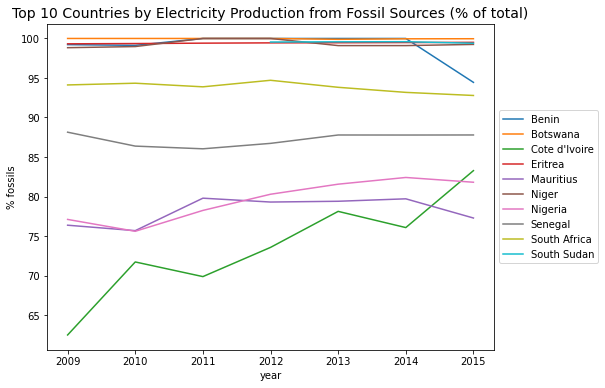

In [17]:
plt.plot(Benin['year'], Benin['% fossil fuel'], label='Benin')
plt.plot(Botswana['year'], Botswana['% fossil fuel'], label='Botswana')
plt.plot(Cote_d_Ivoire['year'], Cote_d_Ivoire['% fossil fuel'], label="Cote d'Ivoire")
plt.plot(Eritrea['year'], Eritrea['% fossil fuel'], label='Eritrea')
plt.plot(Mauritius['year'], Mauritius['% fossil fuel'], label='Mauritius')
plt.plot(Niger['year'], Niger['% fossil fuel'], label='Niger')
plt.plot(Nigeria['year'], Nigeria['% fossil fuel'], label='Nigeria')
plt.plot(Senegal['year'], Senegal['% fossil fuel'], label='Senegal')
plt.plot(South_Africa['year'], South_Africa['% fossil fuel'], label='South Africa')
plt.plot(South_Sudan['year'], South_Sudan['% fossil fuel'], label='South Sudan')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('year')
plt.ylabel('% fossils')
plt.title('Top 10 Countries by Electricity Production from Fossil Sources (% of total)', fontdict={'fontsize':14})
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

##### Figure 1. Time series of top 10 SSA countries by electricity production from fossil fuels. (Wang, 2021)

The figure shows top 10 countries in sub-Saharan Africa that generate their energy from fossil fuels (oil, gas, coal). This is calculated as a percentage of the total energy generated in each country. Our focus is on 2015 but the time series provides historical context. Multiple countries are at ~100% and the lowest recorded level of fossil-generated energy among top 10 countries between the 2009-2015 timespan is ~62% or two-thirds of total energy. 


In [18]:
#loading and transforming data for renewable energy
renewables = pd.read_csv('/Users/aminrimdans/Downloads/wdi_data-5.csv',usecols=['Year','value','Country Name'])
#renewables.info()
renewables.rename(columns={'value':'% renewables','Year':'year'}, inplace=True)
#renewables.head()

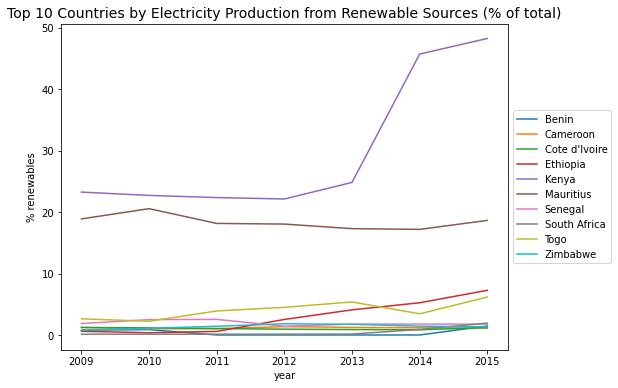

In [19]:
#filtering and plotting renewables data by country

Benin=renewables[renewables['Country Name']=='Benin']
Cameroon=renewables[renewables['Country Name']=='Cameroon']
Cote_d_Ivoire=renewables[renewables['Country Name']=="Cote d'Ivoire"]
Ethiopia=renewables[renewables['Country Name']=='Ethiopia']
Kenya=renewables[renewables['Country Name']=='Kenya']
Mauritius=renewables[renewables['Country Name']=='Mauritius']
Senegal=renewables[renewables['Country Name']=='Senegal']
South_Africa=renewables[renewables['Country Name']=='South Africa']
Togo=renewables[renewables['Country Name']=='Togo']
Zimbabwe=renewables[renewables['Country Name']=='Zimbabwe']

plt.plot(Benin['year'], Benin['% renewables'], label='Benin')
plt.plot(Cameroon['year'], Cameroon['% renewables'], label='Cameroon')
plt.plot(Cote_d_Ivoire['year'], Cote_d_Ivoire['% renewables'], label="Cote d'Ivoire")
plt.plot(Ethiopia['year'], Ethiopia['% renewables'], label='Ethiopia')
plt.plot(Kenya['year'], Kenya['% renewables'], label='Kenya')
plt.plot(Mauritius['year'], Mauritius['% renewables'], label='Mauritius')
plt.plot(Senegal['year'], Senegal['% renewables'], label='Senegal')
plt.plot(South_Africa['year'], South_Africa['% renewables'], label='South Africa')
plt.plot(Togo['year'], Togo['% renewables'], label='Togo')
plt.plot(Zimbabwe['year'], Zimbabwe['% renewables'], label='Zimbabwe')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('year')
plt.ylabel('% renewables')
plt.title('Top 10 Countries by Electricity Production from Renewable Sources (% of total)', fontdict={'fontsize':14})
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.show()

##### Figure 2. Time series of top 10 SSA countries by electricity production from renewable energy (excluding hydroelectricity; Wang, 2021). 

Conversely to fig.1, this shows top 10 sub-Saharan countries with renewable energy outputs. Only two countries (Kenya and Mauritius) are above 10% in the 6-year period of interest. Every other country produces almost none of their electricity from renewable sources, not to mention tens of other SSA countries not represented in the top 10 category. Kenya is highest at 48.3%, also absent in top 10 fossil fuel countries in fig.1, which demonstrates tangible effort towards steering away from fossils. Nevertheless, Kenya is below 25% until 2013-2015, rising to 48.3% in 2015. Achieving half its generated electricity from renewables, Kenya shows striding progress and performed better than all European & Central Asian countries except Denmark (65.4%) in 2015.


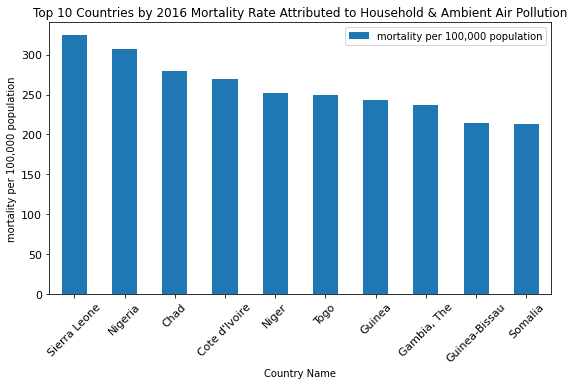

In [20]:
#loading air pollution mortality data from different csv file; renamed and sorted columns; mortality column is float
mortality = pd.read_csv('/Users/aminrimdans/Downloads/wdi_data-2.csv', usecols=['Country Name','value'],
                       index_col='Country Name')
mortality.rename(columns={'Country Name':'country', 'value':'mortality per 100,000 population'}, inplace=True)
mortality = mortality.sort_values('mortality per 100,000 population', ascending=False)
#mortality.info()


#plotting mortality data
mortality.plot.bar(title='Top 10 Countries by 2016 Mortality Rate Attributed to Household & Ambient Air Pollution',
               ylabel='mortality per 100,000 population', figsize=(9,5), fontsize=11)
plt.xticks(rotation=45)
plt.show()

##### Figure 3. Bar chart of 2016 top 10 SSA countries with mortality attributed to air pollution (Wang, 2021).

Fig.3 depicts SSA countries with the 10 highest mortality rates, per 100,000 population, caused by either household or ambient air pollution. The data is from year 2016, which is outside our period of interest, but is the only mortality data available closest to 2015 that fits the criteria of interest. Nevertheless, according to the US National Aeronautics and Space Administration (NASA), the lifetime of atmospheric CO2 ranges between 300 – 1,000 years, hence, the time difference between our period of interest and 2016 could be considered inconsequential (Alan Buis, NASA, 2019). Though renewable energy production is negligibly low in most countries in the region, based on this analysis, only two out of ten countries with notable air pollution mortality rates are found in fig.2. This 80% dissimilarity rate indicates there is a negative correlative relationship between renewable electricity production and mortality ensuing from air pollution. This inference is, however, not supported by the low correlation (30%) between fossil-generated electricity (fig.1) and mortality (fig.3). This is not surprising as other phenomena might contribute more heavily to air pollution in certain countries. Side note, less than a percent in grand scheme of population (for high-population countries like Nigeria) and much higher percentage for low-population countries like Guinea-Bissau. Notwithstanding, being that majority of the countries are considered underdeveloped, reported data could be drastically unrepresentative of actual mortality resulting from polluted air. 


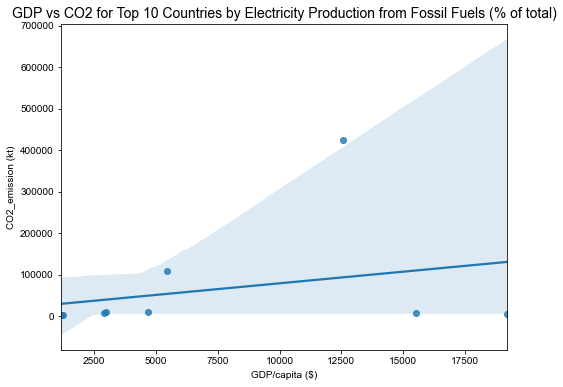

In [21]:
#filtering out top 10 countries in 2015 for % fossil fuel rate
twenty_fifteen=df[df['year']==2015]
top_10_fossil=twenty_fifteen.nlargest(10,'% fossil fuel')


#plotting top 10 fossil fuel data
a=sns.regplot(x='GDP/capita ($)', y='CO2_emission (kt)', data=top_10_fossil)
sns.set_theme(style='white')
plt.title('GDP vs CO2 for Top 10 Countries by Electricity Production from Fossil Fuels (% of total)',
          fontdict={'fontsize':14})
a.figure.set_size_inches(8,6)
plt.show()

##### Figure 4. Scatterplot with trendline showing relationship between 2015 CO2 emissions and GDP per capita in top 10 SSA countries by CO2 emissions.

Similar to fig.1, fig.4 uses the same top 10 SSA countries—whose electricity production is almost solely reliant on non-renewable energy—but employs a scatterplot and trendline to depict the relationship between carbon dioxide emissions and GDP per capita in 2015. A positive correlation is evident: as GDP per capita increases, carbon dioxide emissions increase. This is plausible being that GDP is the total worth of a country’s goods and services within a year and if a country produces more (higher GDP) and utilizes mostly fossil fuels to achieve such production, more carbon dioxide emissions can be expected. 


## Conclusion & Implications

Sub-Saharan Africa is a densely populated region of the world that will be key in resolving our climate crsis. In fig.1 of this report, there is a cluster of countries around the 95-100% mark for electricity generation from fossil fuels. 5 of the top 10 countries in this category are between 97-100% while 80% of top countries producing their electricity from renewable energy in the region only do so at a rate of less than 10%. Botswana, Eritrea, South Sudan, and Niger all produced a large 99% of their electricity from fossil sources in 2015. Only Kenya produced 48% of its electricity from renewable sources, followed by Mauritius at a low 18%. As depicted in fig.3, our data shows a positive correlation between GDP per capita and CO2 emission. High CO2 can in turn cause increased mortality due to polluted ambient air. In summary, when compared with other countries making strides in renewable energy electricity generation who, in comparison, do not have resources unique to SSA (e.g. sunlight), it is clear that there is a gap in maximizing green energy potential in the world region that is home to 13% of our global population. This has the potential to drastically slow global efforts towards sustainability.

## References

Alan Buis, NASA. (2019). The Atmosphere: Getting a Handle on Carbon Dioxide. Climate Change: Vital Signs of the Planet. https://climate.nasa.gov/news/2915/the-atmosphere-getting-a-handle-on-carbon-dioxide

Baye, R. S., Olper, A., Ahenkan, A., Musah-Surugu, I. J., Anuga, S. W., & Darkwah, S. (2021). Renewable energy consumption in Africa: Evidence from a bias corrected dynamic panel. Science of The Total Environment, 766, 142583. https://doi.org/10.1016/j.scitotenv.2020.142583

Marques, A. C., & Fuinhas, J. A. (2011). Drivers promoting renewable energy: A dynamic panel approach. Renewable and Sustainable Energy Reviews, 15(3), 1601–1608. https://doi.org/10.1016/j.rser.2010.11.048

Mohammed, Y. S., Mustafa, M. W., & Bashir, N. (2013). Status of renewable energy consumption and developmental challenges in Sub-Sahara Africa. Renewable and Sustainable Energy Reviews, 27, 453–463. https://doi.org/10.1016/j.rser.2013.06.044

Organization of the Petroleum Exporting Countries (OPEC). Annual Statistical Bulletin (ASB). https://www.opec.org/opec_web/en/about_us/167.htm

Wang, C. (2021). The world development explorer. Available from http://www.worlddev.xyz
